# Exercise 3

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

n=10000
u = np.random.uniform(0,1,n)

1. Generate simulated values from the following distributions and verify the results by comparing histograms with analytical results and perform tests for distribution type.


(a) Exponential distribution

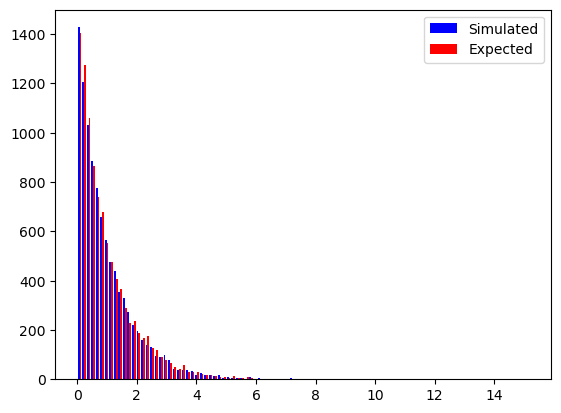


 Simulated mean: 0.9920434444516357

 Simulated variance: 0.9851649847745746

 Mean of the exponential distribution is: 1.0

 Variance of the exponential distribution is: 1.0

 p-value: 0.8637788214366747


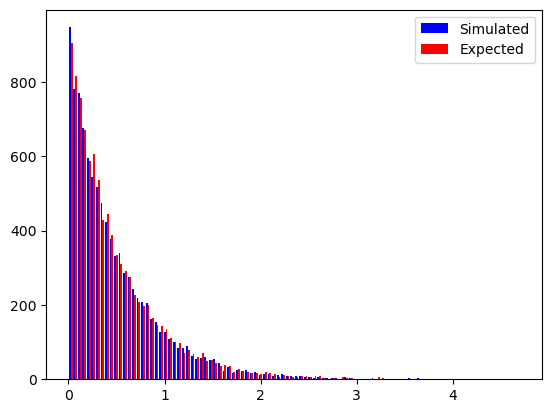


 Simulated mean: 0.49602172222581786

 Simulated variance: 0.24629124619364365

 Mean of the exponential distribution is: 0.5

 Variance of the exponential distribution is: 0.25

 p-value: 0.8637788214366747


In [3]:
def exps(x,l):
   return [-math.log(x[i])/l for i in range(len(x))]

for l in range(1,3):
    sim = exps(u,l)
    exp = stats.expon.rvs(scale = 1/l,  size = n)
   # exp = np.random.exponential(scale=1/l, size=n)
    plt.hist([sim,exp], bins=100, label=["Simulated","Expected"], color=["blue", "red"])
    plt.legend(loc='upper right')
    plt.show()
    sim_mean = np.mean(sim)
    print("\n Simulated mean:", sim_mean)
    sim_var = np.var(sim)
    print("\n Simulated variance:", sim_var)
    exp_mean = 1/l
    print("\n Mean of the exponential distribution is:", exp_mean)
    exp_var = 1/l**2
    print("\n Variance of the exponential distribution is:", exp_var)
    _, p_value = stats.kstest(sim, stats.expon(scale=1/l).cdf)
    print("\n p-value:", p_value)

(b) Normal distribution (at least with standard Box-Mueller)

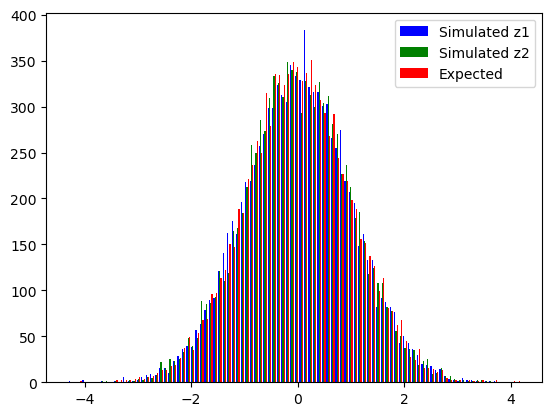


 Simulated mean: [0.01420436 0.00631764]

 Simulated variance: [1.01029714 0.99369798]

 p-values: 0.3030500333254532 0.587160295913729


In [4]:
def box_muller(n):
    u1 = np.random.uniform(0,1,n)
    u2 = np.random.uniform(0,1,n)
    theta = 2*np.pi*u2
    r = np.sqrt(-2*np.log(u1))
    if all(np.sin(theta)**2+np.cos(theta)**2) <= 1:
        z1 = r*np.sin(theta)
        z2 = r*np.cos(theta)
    return z1,z2

z1,z2 = box_muller(n)
plt.hist([z1,z2,np.random.normal(0, 1, n)], bins=100, label=["Simulated z1","Simulated z2","Expected"], color=["blue", "green", "red"])
plt.legend(loc='upper right')
plt.show()
sim_means = np.array([np.mean(z1),np.mean(z2)])
print("\n Simulated mean:", sim_means)
sim_vars = np.array([np.var(z1),np.var(z2)])
print("\n Simulated variance:", sim_vars)
p_value1 = stats.kstest(z1, 'norm').pvalue
p_value2 = stats.kstest(z2, 'norm').pvalue
print("\n p-values:", p_value1, p_value2)


(c) Pareto distribution, with β = 1 and experiment with different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4

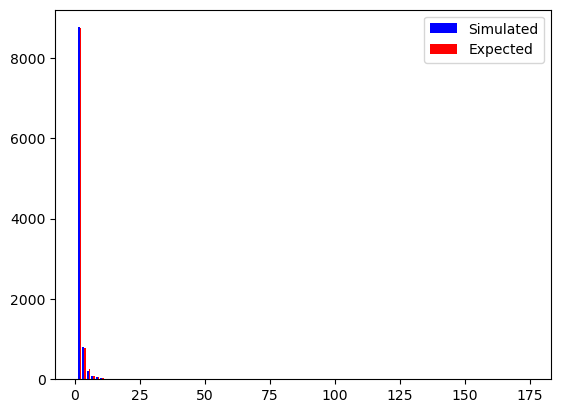


 Simulated mean: 1.9385826731468114

 Simulated variance: 5.7531646515845445

 Mean of the pareto distribution is: 1.9523809523809526

 Variance of the pareto distribution is: 37.18820861678019

 p-value: 0.8637788214366747


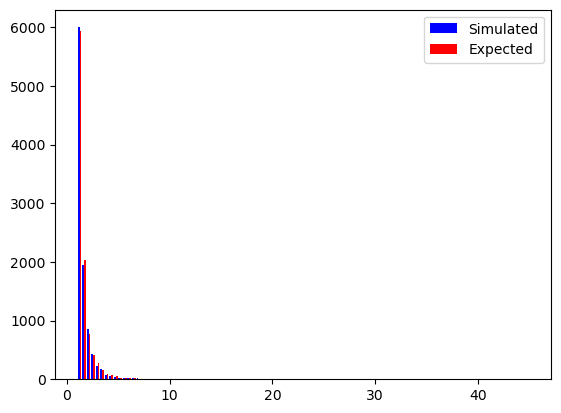


 Simulated mean: 1.6588892843003924

 Simulated variance: 1.686778155351424

 Mean of the pareto distribution is: 1.6666666666666667

 Variance of the pareto distribution is: 2.2222222222222223

 p-value: 0.8637788214366747


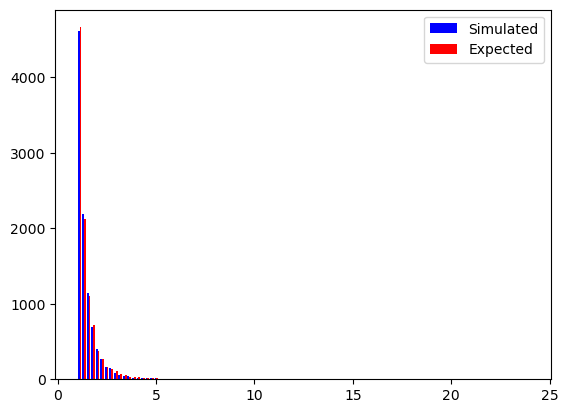


 Simulated mean: 1.4946783318027597

 Simulated variance: 0.6826929331023815

 Mean of the pareto distribution is: 1.5

 Variance of the pareto distribution is: 0.75

 p-value: 0.8637788214366747


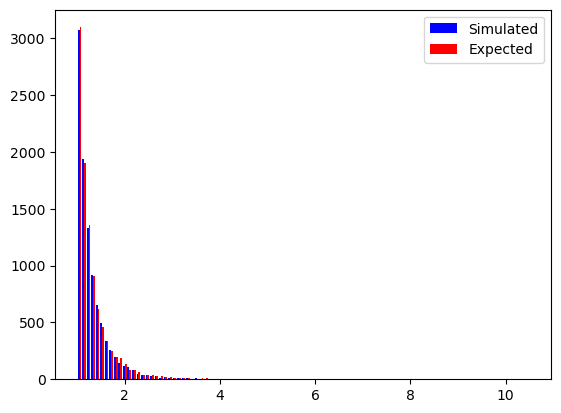


 Simulated mean: 1.330053554589019

 Simulated variance: 0.21582789797656823

 Mean of the pareto distribution is: 1.3333333333333333

 Variance of the pareto distribution is: 0.2222222222222222

 p-value: 0.8637788214366747


In [5]:
def  paketo(x,b,k):
    return [b*(math.pow(x[i],-1/k)) for i in range(len(x))]

b = 1
k = np.array([2.05, 2.5, 3, 4])
for i in range(len(k)):
    sim = paketo(u,b,k[i])
    exp = np.random.pareto(k[i], n) + b
    plt.hist([sim,exp], bins=100, label=["Simulated","Expected"], color=["blue","red"])
    plt.legend(loc='upper right')
    plt.show()
    sim_mean = np.mean(sim)
    print("\n Simulated mean:", sim_mean)
    sim_var = np.var(sim)
    print("\n Simulated variance:", sim_var)
    exp_mean = k[i]*b/(k[i]-1)
    print("\n Mean of the pareto distribution is:", exp_mean)
    exp_var = k[i]*b**2/((k[i]-2)*(k[i]-1)**2)
    print("\n Variance of the pareto distribution is:", exp_var)
    p_value = stats.kstest(sim, 'pareto',args=(k[i],)).pvalue
    print("\n p-value:", p_value)

2. For the Pareto distribution with support on [β,∞] compare mean value and variance, with analytical results. Explain problems if any.

While the mean of the simulated sample is nearly equal with analytical result for all $k$'s, that is not the case for the variance. The more $k$ approaches 2 the larger the analytical variance.


3. For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.

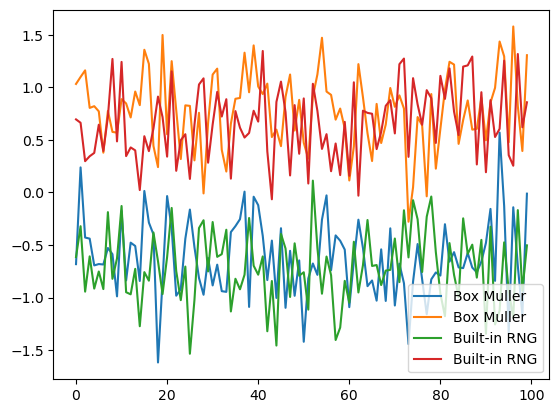

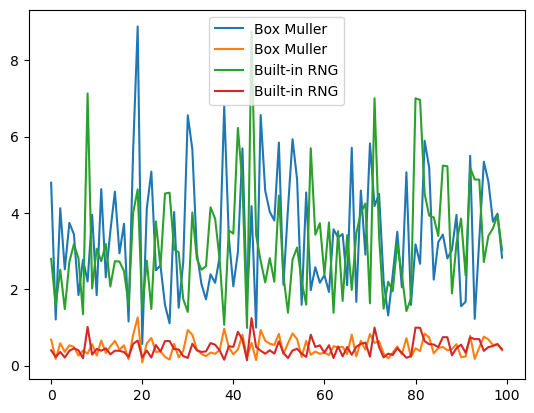

In [10]:
def generate_confidence_intervals(data, confidence_level):
    n = len(data)
    mean = np.mean(data)
    var = np.var(data, ddof=1)  # Use ddof=1 for unbiased variance estimation
    std = np.sqrt(var)
    alpha = 1 - confidence_level

    z_critical = stats.t.ppf(1 - alpha / 2, df=n - 1)
    margin_of_error_mean = z_critical * (std / np.sqrt(n))
    margin_of_error_var = ((n - 1) * var) / stats.chi2.ppf(alpha / 2, df=n - 1), ((n - 1) * var) / stats.chi2.ppf(1 - alpha / 2, df=n - 1)

    confidence_interval_mean = (mean - margin_of_error_mean, mean + margin_of_error_mean)
    confidence_interval_var = (margin_of_error_var[0], margin_of_error_var[1])

    return confidence_interval_mean, confidence_interval_var

# Parameters for confidence intervals
sample_size = 10
confidence_level = 0.95
num_intervals = 100

# Generate 100 confidence intervals
confidence_intervals_mean1 = []
confidence_intervals_var1 = []
confidence_intervals_mean2 = []
confidence_intervals_var2 = []
confidence_intervals_mean3 = []
confidence_intervals_var3 = []

for _ in range(num_intervals):
    data1, data2 = box_muller(sample_size)
    data3 = np.random.normal(loc=0, scale=1, size=sample_size)  # Generate 10 observations from a normal distribution
    interval_mean1, interval_var1 = generate_confidence_intervals(data1, confidence_level)
    confidence_intervals_mean1.append(interval_mean1)
    confidence_intervals_var1.append(interval_var1)
    interval_mean2, interval_var2 = generate_confidence_intervals(data2, confidence_level)
    confidence_intervals_mean2.append(interval_mean2)
    confidence_intervals_var2.append(interval_var2)
    interval_mean3, interval_var3 = generate_confidence_intervals(data3, confidence_level)
    confidence_intervals_mean3.append(interval_mean3)
    confidence_intervals_var3.append(interval_var3)

plt.plot(confidence_intervals_mean1, label='Box Muller')
plt.plot(confidence_intervals_mean3, label='Built-in RNG')
plt.legend()
plt.show()
plt.plot(confidence_intervals_var1, label='Box Muller')
plt.plot(confidence_intervals_var3, label='Built-in RNG')
plt.legend()
plt.show()

It can be observed from the above figures, that the CIs of the mean and variance of the simulated data from the Box-Muller method closely resemble that of the built-in random number generator. As reminded by the professor, the true mean of the distribution (0 in this case) is within the CI for the 95% of the cases, which the first figure seems to verify.

4. Simulate from the Pareto distribution using composition.